In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [44]:
customers = pd.read_csv("customers.csv")

In [45]:
transactions = pd.read_csv("transactions.csv")

In [46]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [47]:
customer_features = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()

In [48]:
customer_features = customer_features.merge(customers, on='CustomerID')

In [49]:
customer_features = pd.get_dummies(customer_features, columns=['Region'])

In [50]:
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))

In [51]:
db_scores = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    db_index = davies_bouldin_score(customer_features_scaled, labels)
    silhouette_avg = silhouette_score(customer_features_scaled, labels)
    db_scores.append((k, db_index))
    silhouette_scores.append((k, silhouette_avg))

In [52]:
optimal_k = min(db_scores, key=lambda x: x[1])[0]

In [53]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(customer_features_scaled)
customer_features['Cluster'] = labels

In [54]:
db_index = davies_bouldin_score(customer_features_scaled, labels)
silhouette_avg = silhouette_score(customer_features_scaled, labels)

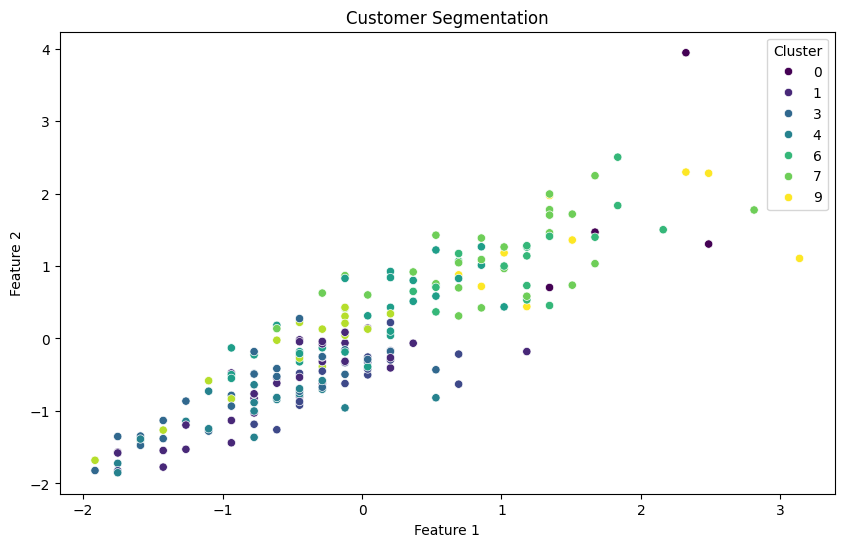

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features_scaled[:, 0], y=customer_features_scaled[:, 1], hue=labels, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

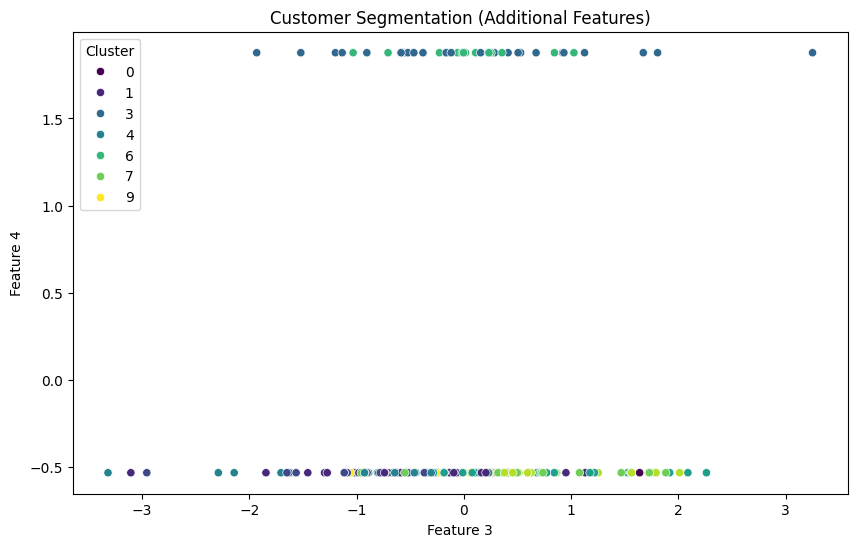

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features_scaled[:, 2], y=customer_features_scaled[:, 3], hue=labels, palette='viridis')
plt.title('Customer Segmentation (Additional Features)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.legend(title='Cluster')
plt.show()

In [61]:
report = {
    'Number of Clusters': optimal_k,
    'DB Index': db_index,
    'Silhouette Score': silhouette_avg
}

In [62]:
report_df = pd.DataFrame(report.items(), columns=['Metric', 'Value'])
db_scores_df = pd.DataFrame(db_scores, columns=['Number of Clusters', 'DB Index'])
silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['Number of Clusters', 'Silhouette Score'])

,Metric,Value
0,Number of Clusters,10.000000
1,DB Index,0.876622
2,Silhouette Score,0.398061


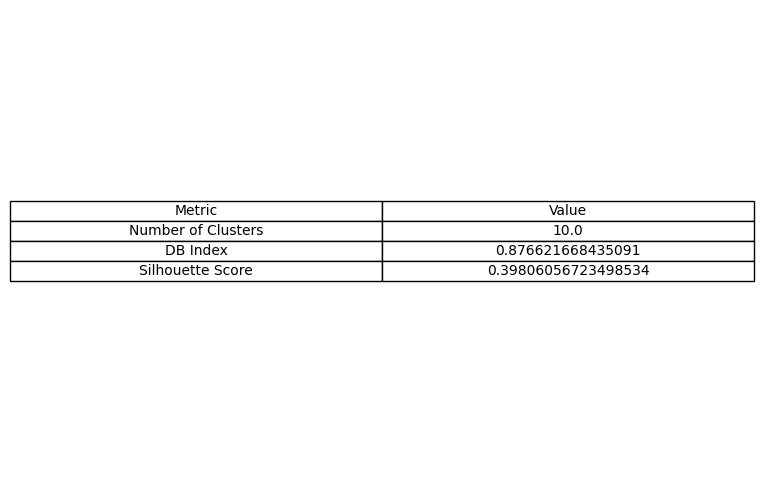

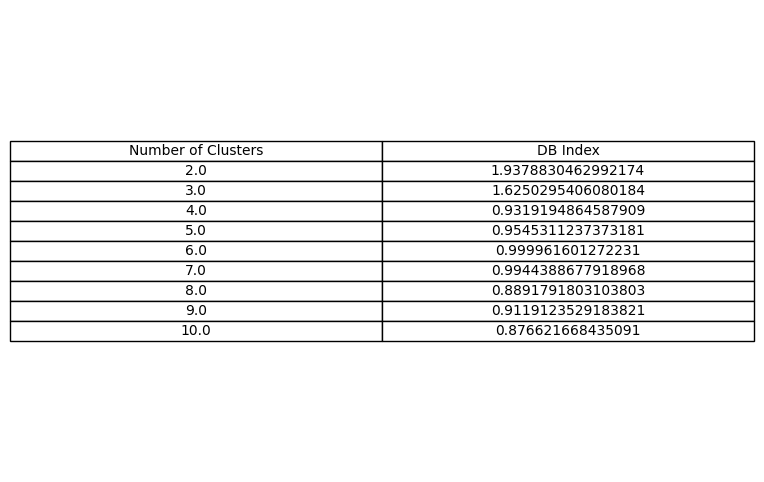

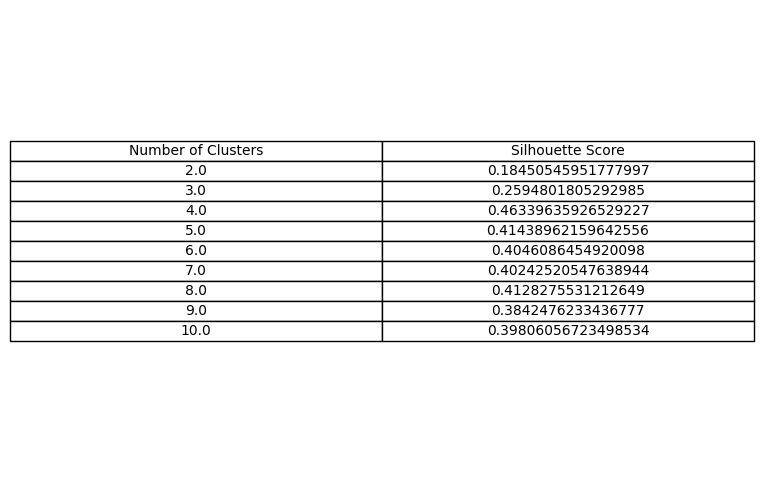

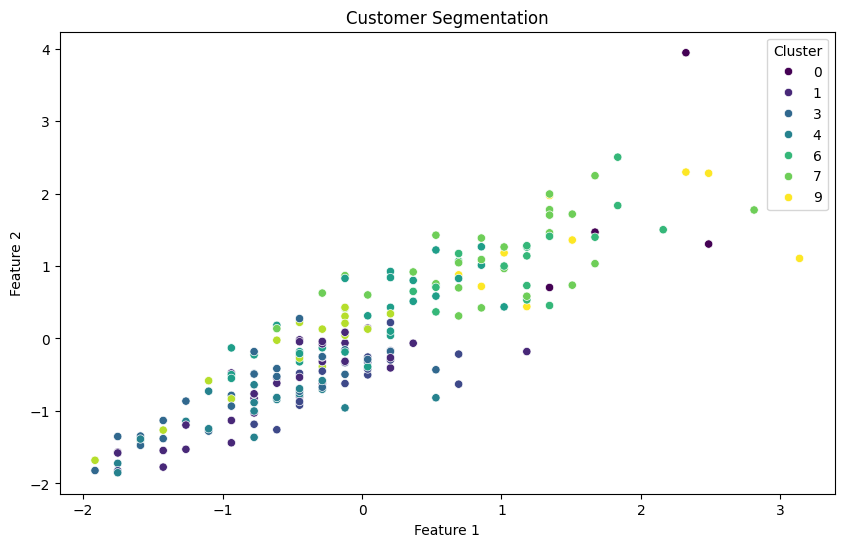

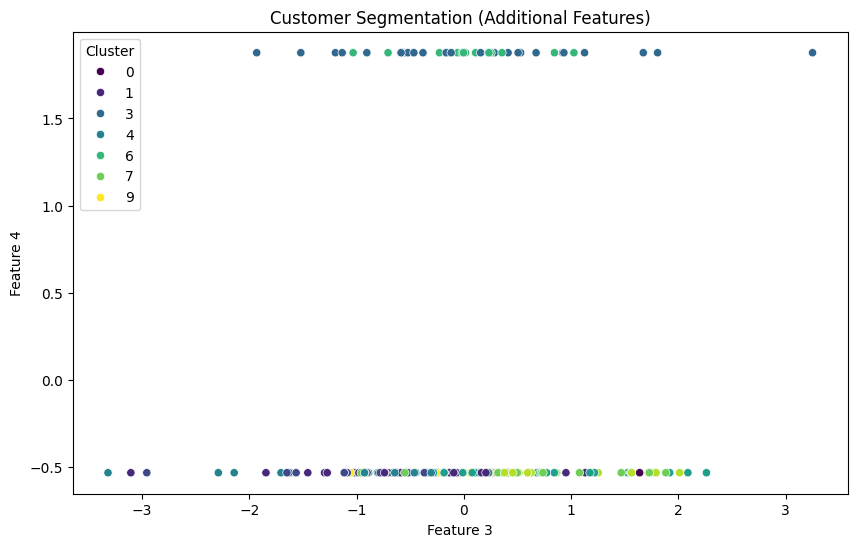

In [63]:
with PdfPages('supriyo_chakraborty_clustering.pdf') as pdf:
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=report_df.values, colLabels=report_df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    pdf.savefig(fig, bbox_inches='tight')
    
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=db_scores_df.values, colLabels=db_scores_df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    pdf.savefig(fig, bbox_inches='tight')
    
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=silhouette_scores_df.values, colLabels=silhouette_scores_df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    pdf.savefig(fig, bbox_inches='tight')

    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=customer_features_scaled[:, 0], y=customer_features_scaled[:, 1], hue=labels, palette='viridis', ax=ax)
    ax.set_title('Customer Segmentation')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(title='Cluster')
    pdf.savefig(fig, bbox_inches='tight')
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=customer_features_scaled[:, 2], y=customer_features_scaled[:, 3], hue=labels, palette='viridis', ax=ax)
    ax.set_title('Customer Segmentation (Additional Features)')
    ax.set_xlabel('Feature 3')
    ax.set_ylabel('Feature 4')
    ax.legend(title='Cluster')
    pdf.savefig(fig, bbox_inches='tight')


report_df